<a href="https://colab.research.google.com/github/SandeeeeeeeeepDey/data-science-11-weeks-progg/blob/main/transfer_learning_with_next_to_no_k_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

In [ ]:
(X_train_full, y_train_full), (X_test,y_test) = tf.keras.datasets.mnist.load_data()


11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
X_train_full.shape

(60000, 28, 28)

In [ ]:
X_valid, X_train = X_train_full[:5000] / 255, X_train_full[5000:] / 255
y_valid, y_train = y_train_full[:5000] / 255, y_train_full[5000:]
X_test = X_test / 255

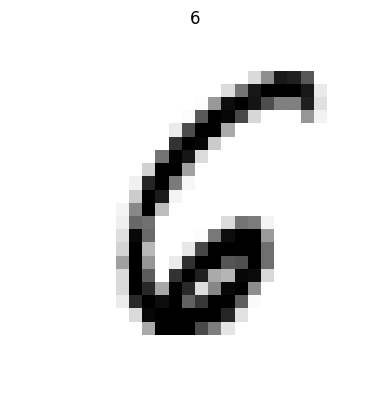

In [ ]:
for i in range(40):
    plt.imshow(X_train[i], cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(y_train[i])

In [ ]:
class Mnist(tf.keras.Model):
    def __init__(self, **kwargs):
        super().__init__(**kwargs)
        self.flatten = tf.keras.layers.Flatten(input_shape=(28, 28))
        self.norm1 = tf.keras.layers.BatchNormalization()
        self.norm2 = tf.keras.layers.BatchNormalization()
        self.dens1 = tf.keras.layers.Dense(300, kernel_initializer="he_normal")
        self.dens2 = tf.keras.layers.Dense(200, kernel_initializer="he_normal")
        self.activ = tf.keras.layers.Activation("swish")
        self.op = tf.keras.layers.Dense(10, activation="softmax")

    def call(self, input):
        input = self.flatten(input)
        h1 = self.dens1(input)
        norm1 = self.norm1(h1)
        activ1 = self.activ(norm1)
        h2 = self.dens2(activ1)
        norm2 = self.norm2(h2)
        activ2 = self.activ(norm2)
        op = self.op(activ2)
        return op

model = Mnist()

In [ ]:
optimizer = tf.keras.optimizers.SGD(learning_rate = 1e-3)

In [ ]:
model.compile(loss = "sparse_categorical_crossentropy", optimizer = optimizer, metrics = ["accuracy"])

In [ ]:
history = model.fit(X_train, y_train, epochs = 200, validation_data = (X_valid, y_valid))

Epoch 1/200
1719/1719 [==============================] - 26s 12ms/step - loss: 1.0734 - accuracy: 0.6895 - val_loss: 4.2793 - val_accuracy: 0.0910
Epoch 2/200
1719/1719 [==============================] - 12s 7ms/step - loss: 0.5596 - accuracy: 0.8553 - val_loss: 5.0437 - val_accuracy: 0.0914
Epoch 3/200
1719/1719 [==============================] - 11s 7ms/step - loss: 0.4515 - accuracy: 0.8792 - val_loss: 5.4757 - val_accuracy: 0.0920
Epoch 4/200
1719/1719 [==============================] - 11s 6ms/step - loss: 0.3940 - accuracy: 0.8930 - val_loss: 5.8338 - val_accuracy: 0.0926
Epoch 5/200
1719/1719 [==============================] - 10s 6ms/step - loss: 0.3559 - accuracy: 0.9026 - val_loss: 6.1094 - val_accuracy: 0.0932
Epoch 6/200
1719/1719 [==============================] - 11s 6ms/step - loss: 0.3273 - accuracy: 0.9091 - val_loss: 6.3794 - val_accuracy: 0.0930
Epoch 7/200
1719/1719 [==============================] - 11s 6ms/step - loss: 0.3091 - accuracy: 0.9144 - val_loss: 6.6054 

In [ ]:
model.save("model_A", save_format = "tf")

In [ ]:
test = pd.read_csv("/content/test.csv")
train = pd.read_csv("/content/train.csv")
valid = pd.read_csv("/content/Dig-MNIST.csv")

In [ ]:
test

,id,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4995,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4996,4996,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4997,4997,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4998,4998,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
train = pd.read_csv("/content/train.csv")

In [ ]:
train.shape

(60000, 785)

In [ ]:
valid = pd.read_csv("/content/Dig-MNIST.csv")

In [ ]:
valid.shape

(10240, 785)

In [ ]:
model_A = tf.keras.models.load_model("model_A")

In [ ]:
model_A.summary()

Model: "mnist"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           multiple                  0         
                                                                 
 batch_normalization (Batch  multiple                  1200      
 Normalization)                                                  
                                                                 
 batch_normalization_1 (Bat  multiple                  800       
 chNormalization)                                                
                                                                 
 dense (Dense)               multiple                  235500    
                                                                 
 dense_1 (Dense)             multiple                  60200     
                                                                 
 activation (Activation)     multiple                  0     

In [ ]:
model_A_clone = tf.keras.models.clone_model(model_A)

In [ ]:
model_A_clone.set_weights(model_A.get_weights())

ValueError: You called `set_weights(weights)` on layer "mnist" with a weight list of length 14, but the layer was expecting 0 weights. Provided weights: [array([1.0118204 , 1.0036741 , 0.98948866, 1.0074...

* Feature importance from model parameters.
> - Recap on what feature importance is. (ie.reason for using a Random Forest model)
> - Why we were trying to find out what feature importance is. (To understand the reason behind why we are getting the present score and try to gain a deeper understanding on what the model is predicting based on or what raises suspicion)
> - What we found. (The most important Features recap on what the features are)  ALSO  The number of features we used were not enough

* New features considered and removed in current training run.
> - Based on our findings we removed some features like sourceCampaign which helped a little and began to give more importance to recent info.
> - Transcripts, comments and whatsapp chats

* Improvement in metric with only web data from 59 - 62.5 F1 score.
* Currently working on integrating transcription and web model.
* ⁠Discussion on report sent.

statistical scoring using statistics and feature importance.

